### Importando as Bibliotecas necessárias

In [214]:
import pandas as pd
import matplotlib.pyplot as plt

### Gerando os DataFrames a partir dos CSV's coletados

In [215]:
kills_df = pd.read_csv('kills.csv')
deaths_df = pd.read_csv('deaths.csv')

# Mesclando as duas tabelas em uma só

merged_df = pd.merge(kills_df, deaths_df, on='Ign')

#### Removendo a coluna duplicada Team_y

In [216]:
merged_df.drop('Team_y', axis=1, inplace=True)

#### Renomeando as colunas para nomes mais descritivos

In [217]:
merged_df.rename(columns={"Team_x": "Team"}, inplace=True)
merged_df.rename(columns={"Ign": "Player"}, inplace=True)
merged_df

,Player,Team,Kills,Deaths
0,Demon1,Evil Geniuses,67,42
1,Ethan,Evil Geniuses,55,37
2,Smoggy,EDward Gaming,46,46
3,CHICHOO,EDward Gaming,42,45
4,ZmjjKK,EDward Gaming,42,52
5,C0M,Evil Geniuses,41,37
6,BuZz,DRX,41,31
7,whzy,Bilibili Gaming,39,36
8,Boostio,Evil Geniuses,39,42
9,something,Paper Rex,39,22


### Atribuindo a coluna de nomes para a coluna indíce

In [218]:
merged_df.set_index('Player', inplace=True)

#### Criando uma nova coluna com o cálculo de K/D (Abates/Mortes)

In [219]:
kd_s = merged_df['Kills'] / merged_df['Deaths']

In [220]:
# Formatando o resultado para que seja mostrado apenas dois pontos flutuantes após a vírgula.
merged_df['K/D'] = kd_s.apply(lambda x: '{:.2f}'.format(x))

In [221]:
# Como foi feita a formatação no bloco acima, o tipo da coluna 'K/D' está como string ou 'Object'. Devemos converter novamente para float
merged_df['K/D'] = merged_df['K/D'].astype(float)
merged_df

,Team,Kills,Deaths,K/D
Player,,,,
Demon1,Evil Geniuses,67,42,1.60
Ethan,Evil Geniuses,55,37,1.49
Smoggy,EDward Gaming,46,46,1.00
CHICHOO,EDward Gaming,42,45,0.93
ZmjjKK,EDward Gaming,42,52,0.81
C0M,Evil Geniuses,41,37,1.11
BuZz,DRX,41,31,1.32
whzy,Bilibili Gaming,39,36,1.08
Boostio,Evil Geniuses,39,42,0.93


#### Criando a tabela final para visualização dos dados

In [222]:
# Identificando o id dos jogadores com maior K/D de cada time
idx = merged_df.groupby('Team')['K/D'].idxmax()

In [223]:
highest_kd_player_df = merged_df.loc[idx]

In [224]:
highest_kd_player_df

,Team,Kills,Deaths,K/D
Player,,,,
whzy,Bilibili Gaming,39,36,1.08
Zest,DRX,38,28,1.36
Smoggy,EDward Gaming,46,46,1.00
Demon1,Evil Geniuses,67,42,1.60
Alfajer,FNATIC,33,28,1.18
MrFaliN,FUT Esports,31,33,0.94
aspas,LOUD,38,25,1.52
something,Paper Rex,39,22,1.77


In [225]:
# Ordenando os valores por 'K/D' (Maior --> Menor)
highest_kd_player_sorted_df= highest_kd_player_df.sort_values(by='K/D', ascending=False)
highest_kd_player_sorted_df

,Team,Kills,Deaths,K/D
Player,,,,
something,Paper Rex,39,22,1.77
Demon1,Evil Geniuses,67,42,1.60
aspas,LOUD,38,25,1.52
Zest,DRX,38,28,1.36
Alfajer,FNATIC,33,28,1.18
whzy,Bilibili Gaming,39,36,1.08
Smoggy,EDward Gaming,46,46,1.00
MrFaliN,FUT Esports,31,33,0.94


### Criando a visualização em MatplotLib

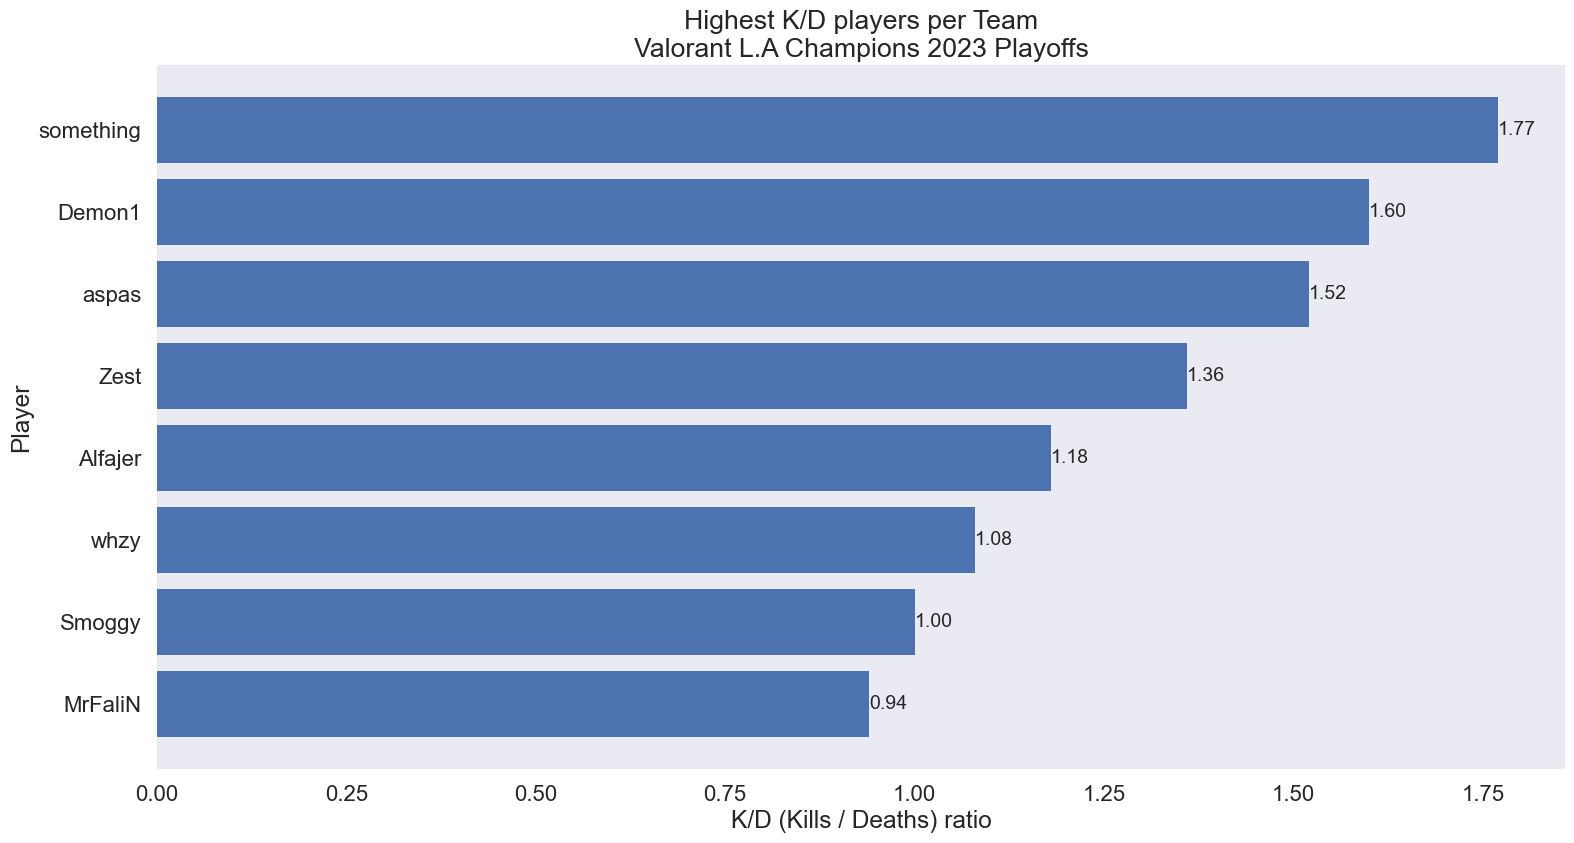

In [226]:
y_axis = list(highest_kd_player_sorted_df.index)
x_axis = highest_kd_player_sorted_df['K/D'].iloc[::-1]

plt.style.use('seaborn-v0_8-dark')
plt.barh(y_axis[::-1],x_axis)
plt.ylabel('Player')
plt.xlabel('K/D (Kills / Deaths) ratio')
plt.title('Highest K/D players per Team\nValorant L.A Champions 2023 Playoffs')
for index, value in enumerate(x_axis):
    plt.text(value, index, "{:.2f}".format(value), ha='left', va='center')
plt.subplots_adjust(left=0.5, right=1.6, top=0.9, bottom=0.1)
plt.show()

### Gerando o csv final após todas as alterações

In [227]:
highest_kd_player_sorted_df.to_csv('Highest_kd_player_per_team.csv', index=True)